In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['price'] = boston.target

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

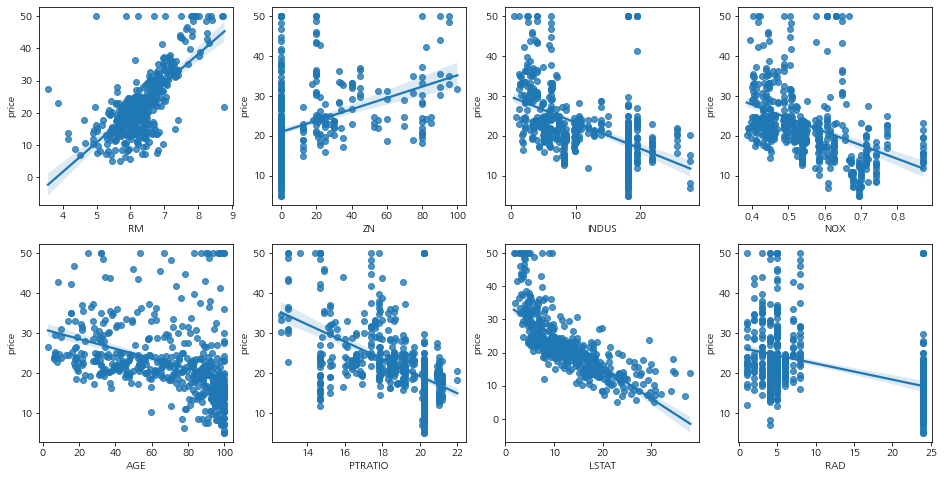

In [11]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='price', data=boston_df, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target,
                                                    test_size=0.3,
                                                    random_state=156)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

In [20]:
print(mse, rmse)

17.296915907902058 4.158956107955704


In [21]:
print(r2)

0.7572263323138935


In [24]:
np.round(lr.coef_,1) #회귀계수(학습된자료)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [23]:
lr.intercept_ #절편

40.99559517216412

In [ ]:
#릿지(알파값 많이 들어가면 규제 많으 ㅅ한거) + 값이 큰 데이터 ex.-19.8 ~~ 는 줄여줌 > 0은 안됨
#라쏘 :규제를 많이 줄수록 0으로 만들어서 탈락시키는 역할 > 피쳐셀렉션 >> 과적합 문제때문에..
 # 과적합 >> 행의 개수가 주 ㄹ어들수록 발생
#엘라스틱넷 : 
#로지스틱 회귀 : 0~1사이의 값으로 무조ㅓ건 바꿈 . 0.5까지는 0, 보다 크면 1 >> 이진법 사용

#모델 만드려면 뭐하고싶은지 정하고 > 분류/연속적인 숫자값 맞추고싶은지 > 결정 후 데이터 수집 > 데이터 전처리
 # (전문적 데이터일 경우, 데이터에 대한 지식 필요) > 분리 (학습, 예측에 쓸꺼) > (얼마나 성능이 뛰어난지)평가하기
  # 서비스 개발이나 뭐 ~ ~~ 한다... > 보완점 피드백 유지/보수